In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import glob
import os
from functools import reduce
sys.path.append('../')
from package_global_functions import *

def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

def get_avg_traj(dfs):
    df_avg = reduce(lambda a,b: a.add(b, fill_value=0), dfs)
    df_avg = df_avg/len(dfs)
    return df_avg

def getColormapsPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
    else:
        path = '/res_files'
    return path

def getTlinesPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
    else:
        path = '/res_files'
    return path

In [2]:
latexFont(ticklabelssize=12,labelsize=14)

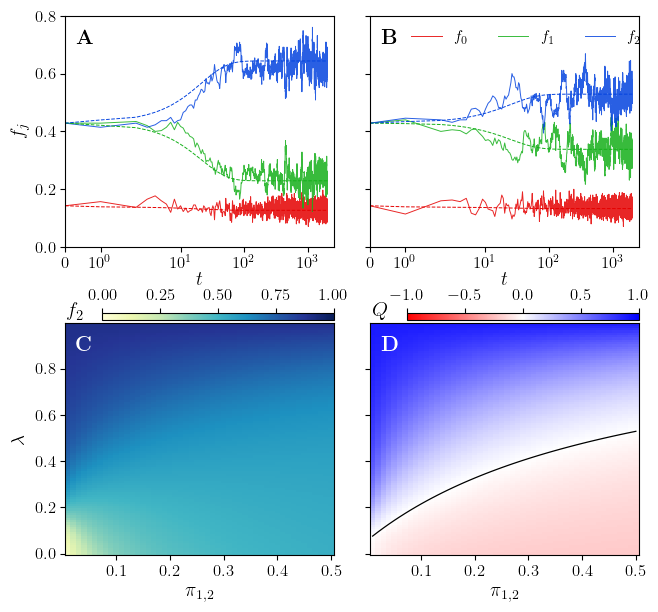

In [7]:
# sublot xungo:
pi1, pi2, q1, q2, l = 0.3, 0.3, 7, 10, 0.6
N = 35

fig, ax = plt.subplots(2,2, figsize=(3.9*2,3.6*2))
fig.subplots_adjust(hspace=0.33, wspace=0.135)

# evo temporal cas simetric
N, pi1, pi2, q1, q2, l = 35, 0.3, 0.3, 7, 10, 0.6
ax[0,0].set(xlabel='$t$', ylabel='$f_j$', xscale='symlog', xlim=(0,2500), ylim=(0,0.8))
ax[0,0].set_xlabel('$t$', labelpad=-0.0)
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia'
intEvoFile = f'/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia_Euler.csv'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
ax[0,0].plot(df_avg['iter'], df_avg['f0'], alpha=0.85, lw=0.7, label='$f_0$', color='xkcd:red')
ax[0,0].plot(df_avg['iter'], df_avg['f1'], alpha=0.85, lw=0.7, label='$f_1$', color='xkcd:green')
ax[0,0].plot(df_avg['iter'], df_avg['f2'], alpha=0.85, lw=0.7, label='$f_2$', color='xkcd:blue')
intEvo = pd.read_csv(f'{getTimeEvosPath()}/{intEvoFile}')
ax[0,0].plot(intEvo['iter'], intEvo['f0'], lw=0.7, ls='--', color='xkcd:red')
ax[0,0].plot(intEvo['iter'], intEvo['f1'], lw=0.7, ls='--', color='xkcd:green')
ax[0,0].plot(intEvo['iter'], intEvo['f2'], lw=0.7, ls='--', color='xkcd:blue')


# evo temporal cas asimetric
N, pi1, pi2, q1, q2, l = 35, 0.4, 0.2, 7, 10, 0.6
ax[0,1].set(xlabel='$t$', xscale='symlog', xlim=(0,2500), ylim=(0,0.8))
ax[0,1].set_xlabel('$t$', labelpad=-0.0)
ax[0,1].tick_params(labelleft=False)
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia'
intEvoFile = f'/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia_Euler.csv'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
ax[0,1].plot(df_avg['iter'], df_avg['f0'], alpha=0.85, lw=0.7, label='$f_0$', color='xkcd:red')
ax[0,1].plot(df_avg['iter'], df_avg['f1'], alpha=0.85, lw=0.7, label='$f_1$', color='xkcd:green')
ax[0,1].plot(df_avg['iter'], df_avg['f2'], alpha=0.85, lw=0.7, label='$f_2$', color='xkcd:blue')
intEvo = pd.read_csv(f'{getTimeEvosPath()}/{intEvoFile}')
ax[0,1].plot(intEvo['iter'], intEvo['f0'], lw=0.7, ls='--', color='xkcd:red')
ax[0,1].plot(intEvo['iter'], intEvo['f1'], lw=0.7, ls='--', color='xkcd:green')
ax[0,1].plot(intEvo['iter'], intEvo['f2'], lw=0.7, ls='--', color='xkcd:blue')
ax[0,1].legend(frameon=False, ncols=3, loc=(0.13,0.85), fontsize=11)



fsMesh = np.load(f'{getColormapsPath()}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - 2*fsMesh['fs'][1]
# colormap simetric f2
ax[1,0].set(xlabel='$\pi_{1,2}$', ylabel='$\lambda$')
im = ax[1,0].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][2], vmin =0, vmax =1, cmap='YlGnBu', shading='nearest', rasterized=True)
# fig.colorbar(im, ax=ax[1,0], location='top')
box = ax[1,0].get_position()
pad, width = 0.0055, 0.01
shrink = 0.05
cax = fig.add_axes([box.xmin+shrink, box.ymax+pad, box.width-shrink, width])
cb = fig.colorbar(im, cax=cax, location='top') # , shrink=0.1
cax.text(-0.15, 0.55, r'$f_2$', transform=cax.transAxes)
# cb.ax.tick_params(labelsize=8)

# colormap simetric Q
ax[1,1].tick_params(labelleft=False)
maxQ = 1
#maxQ = abs(Qmesh).max()
ax[1,1].set(xlabel='$\pi_{1,2}$')
im = ax[1,1].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest', rasterized=True)
tline = pd.read_csv(f'{getTlinesPath()}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_2f1.csv')
tline = tline.query('pi >= 0.01')
ax[1,1].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.9)
box = ax[1,1].get_position()
cax = fig.add_axes([box.xmin+shrink, box.ymax+pad, box.width-shrink, width])
cb = fig.colorbar(im, cax=cax, location='top')
cax.text(-0.15, 0.55, r'$Q$', transform=cax.transAxes)


ax[0,0].text(0.04,0.88, r'$\textbf{A}$', transform=ax[0,0].transAxes, color='xkcd:black')
ax[0,1].text(0.04,0.88, r'$\textbf{B}$', transform=ax[0,1].transAxes, color='xkcd:black')
ax[1,0].text(0.04,0.88, r'$\textbf{C}$', transform=ax[1,0].transAxes, color='xkcd:white')
ax[1,1].text(0.04,0.88, r'$\textbf{D}$', transform=ax[1,1].transAxes, color='xkcd:white')

# fig.tight_layout(pad=0.03)
fig.savefig('figure3_ABCD_timeEvos_cmaps_f2_Q_multiplot_v1.pdf')


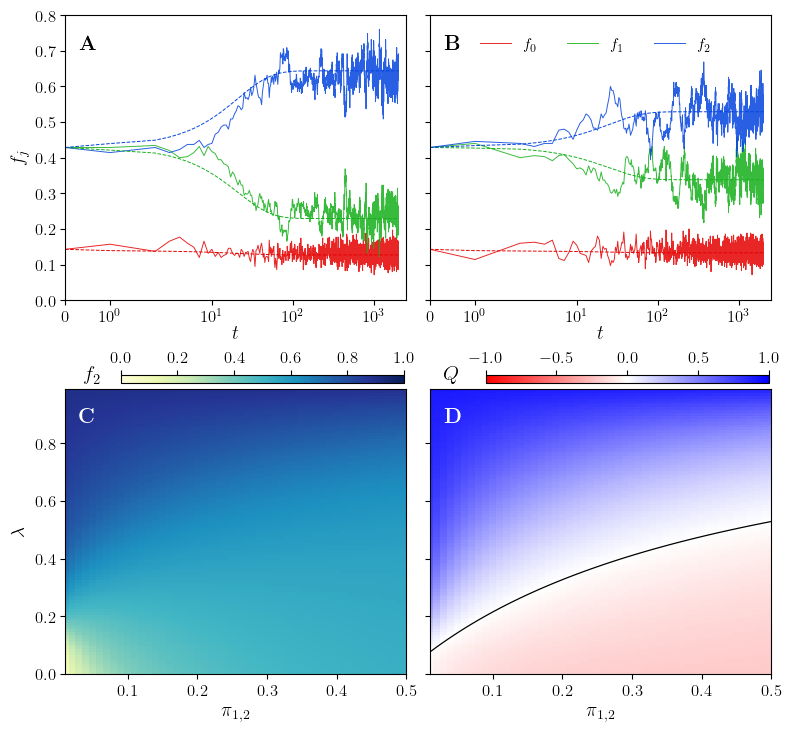

In [3]:
# sublot xungo amb constrained layout:
pi1, pi2, q1, q2, l = 0.3, 0.3, 7, 10, 0.6
N = 35

fig, ax = plt.subplots(2,2, figsize=(3.9*2,3.6*2), height_ratios=[1,1], constrained_layout=True)
# fig.subplots_adjust(hspace=4.0)

# evo temporal cas simetric
N, pi1, pi2, q1, q2, l = 35, 0.3, 0.3, 7, 10, 0.6
ax[0,0].set(xlabel='$t$', ylabel='$f_j$', xscale='symlog', xlim=(0,2500), ylim=(0,0.8))
ax[0,0].set_xlabel('$t$', labelpad=-0.0)
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia'
intEvoFile = f'/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia_Euler.csv'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
ax[0,0].plot(df_avg['iter'], df_avg['f0'], alpha=0.85, lw=0.7, label='$f_0$', color='xkcd:red')
ax[0,0].plot(df_avg['iter'], df_avg['f1'], alpha=0.85, lw=0.7, label='$f_1$', color='xkcd:green')
ax[0,0].plot(df_avg['iter'], df_avg['f2'], alpha=0.85, lw=0.7, label='$f_2$', color='xkcd:blue')
intEvo = pd.read_csv(f'{getTimeEvosPath()}/{intEvoFile}')
ax[0,0].plot(intEvo['iter'], intEvo['f0'], lw=0.7, ls='--', color='xkcd:red')
ax[0,0].plot(intEvo['iter'], intEvo['f1'], lw=0.7, ls='--', color='xkcd:green')
ax[0,0].plot(intEvo['iter'], intEvo['f2'], lw=0.7, ls='--', color='xkcd:blue')


# evo temporal cas asimetric
N, pi1, pi2, q1, q2, l = 35, 0.4, 0.2, 7, 10, 0.6
ax[0,1].set(xlabel='$t$', xscale='symlog', xlim=(0,2500), ylim=(0,0.8))
ax[0,1].set_xlabel('$t$', labelpad=-0.0)
ax[0,1].tick_params(labelleft=False)
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia'
intEvoFile = f'/time_evo_csv_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}_ic_julia_Euler.csv'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]
df_avg = get_avg_traj(dfs)
ax[0,1].plot(df_avg['iter'], df_avg['f0'], alpha=0.85, lw=0.7, label='$f_0$', color='xkcd:red')
ax[0,1].plot(df_avg['iter'], df_avg['f1'], alpha=0.85, lw=0.7, label='$f_1$', color='xkcd:green')
ax[0,1].plot(df_avg['iter'], df_avg['f2'], alpha=0.85, lw=0.7, label='$f_2$', color='xkcd:blue')
intEvo = pd.read_csv(f'{getTimeEvosPath()}/{intEvoFile}')
ax[0,1].plot(intEvo['iter'], intEvo['f0'], lw=0.7, ls='--', color='xkcd:red')
ax[0,1].plot(intEvo['iter'], intEvo['f1'], lw=0.7, ls='--', color='xkcd:green')
ax[0,1].plot(intEvo['iter'], intEvo['f2'], lw=0.7, ls='--', color='xkcd:blue')
ax[0,1].legend(frameon=False, ncols=3, loc=(0.13,0.85), fontsize=11)


fsMesh = np.load(f'{getColormapsPath()}/map_sym_q1_{q1}_q2_{q2}.npz')
Qmesh = fsMesh['fs'][2] - 2*fsMesh['fs'][1]


# colormap simetric f2
ax[1,0].set_xlim(0.01, 0.5)
ax[1,0].set_ylim(0.00, 0.99)
ax[1,0].set(xlabel='$\pi_{1,2}$', ylabel='$\lambda$')
im = ax[1,0].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][2], vmin =0, vmax =1, cmap='YlGnBu', shading='nearest', rasterized=True)
fig.colorbar(im, ax=ax[1,0], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))
# ax[1,0].text(0.05, 1.0, '$f_2$')

# colormap simetric Q
ax[1,1].set_xlim(0.01, 0.5)
ax[1,1].set_ylim(0.00, 0.99)
ax[1,1].tick_params(labelleft=False)
maxQ = 1
#maxQ = abs(Qmesh).max()
ax[1,1].set(xlabel='$\pi_{1,2}$')
im = ax[1,1].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest', rasterized=True)
tline = pd.read_csv(f'{getTlinesPath()}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_2f1.csv')
tline = tline.query('pi >= 0.01')
ax[1,1].plot(tline['pi'], tline['lambda'], color='xkcd:black', lw=0.9)
fig.colorbar(im, ax=ax[1,1], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0),
             ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])
# ax[1,1].text(0.05, 1.2, '$Q$')


ax[0,0].text(0.04,0.88, r'$\textbf{A}$', transform=ax[0,0].transAxes, color='xkcd:black')
ax[0,1].text(0.04,0.88, r'$\textbf{B}$', transform=ax[0,1].transAxes, color='xkcd:black')
ax[1,0].text(0.04,0.88, r'$\textbf{C}$', transform=ax[1,0].transAxes, color='xkcd:white')
ax[1,1].text(0.04,0.88, r'$\textbf{D}$', transform=ax[1,1].transAxes, color='xkcd:white')
fig.text(0.1, 0.48, r'$f_2$', color='xkcd:black')
fig.text(0.56, 0.48, r'$Q$', color='xkcd:black')

fig.savefig('figure3_ABCD_timeEvos_cmaps_f2_Q_multiplot_v2.pdf')

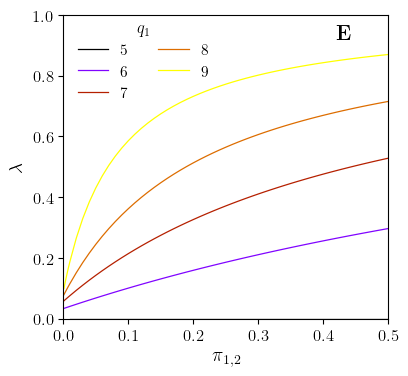

In [8]:
# theoretical lines plot:
q2 = 10.0
q1s = [5,6,7,8,9]

colors = plt.cm.gnuplot(np.linspace(0,1,len(q1s)))
fig, ax = plt.subplots(figsize=(3.9,3.6))

for i,q1 in enumerate(q1s):
    tline = pd.read_csv(f'{getTlinesPath()}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_2f1.csv')
    if tline['lambda'].isnull().sum() == len(tline['lambda']):
        tline = tline.fillna(0)
    ax.plot(tline['pi'], tline['lambda'], label=f'{q1}', color=colors[i], lw=0.9) #, marker='.'
    
ax.set(xlabel='$\pi_{1,2}$', ylabel='$\lambda$', xlim=(0, 0.5), ylim=(0,1))
ax.text(0.84,0.92, r'$\textbf{E}$', transform=ax.transAxes, color='xkcd:black')
ax.legend(title=r'$q_1$', loc=(0.025,0.7), fontsize=11, title_fontsize=12, ncols=2, frameon=False)
fig.tight_layout(pad=0.03)

fig.savefig('figure3_E_sym_Q_Tlines_v1.pdf')

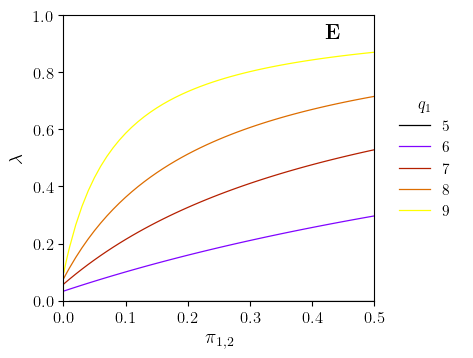

In [9]:
# theoretical lines plot:
q2 = 10.0
q1s = [5,6,7,8,9]

colors = plt.cm.gnuplot(np.linspace(0,1,len(q1s)))
fig, ax = plt.subplots(1, 2, figsize=(4.6,3.4), gridspec_kw={'width_ratios': [4, 1]})

for i,q1 in enumerate(q1s):
    tline = pd.read_csv(f'{getTlinesPath()}/Tline_sym_pis_q1_{float(q1)}_q2_{float(q2)}_f2_2f1.csv')
    if tline['lambda'].isnull().sum() == len(tline['lambda']):
        tline = tline.fillna(0)
    ax[0].plot(tline['pi'], tline['lambda'], label=f'{q1}', color=colors[i], lw=0.9) #, marker='.'
    
ax[0].set(xlabel='$\pi_{1,2}$', ylabel='$\lambda$', xlim=(0, 0.5), ylim=(0,1))
ax[0].text(0.84,0.92, r'$\textbf{E}$', transform=ax[0].transAxes, color='xkcd:black')
hs, ls = ax[0].get_legend_handles_labels()

ax[1].axis('off')
ax[1].legend(hs, ls, title=r'$q_1$', loc='center left', fontsize=11, title_fontsize=12, ncols=1, frameon=False)
fig.tight_layout(pad=0.03)

fig.savefig('figure3_E_sym_Q_Tlines_v2.pdf')